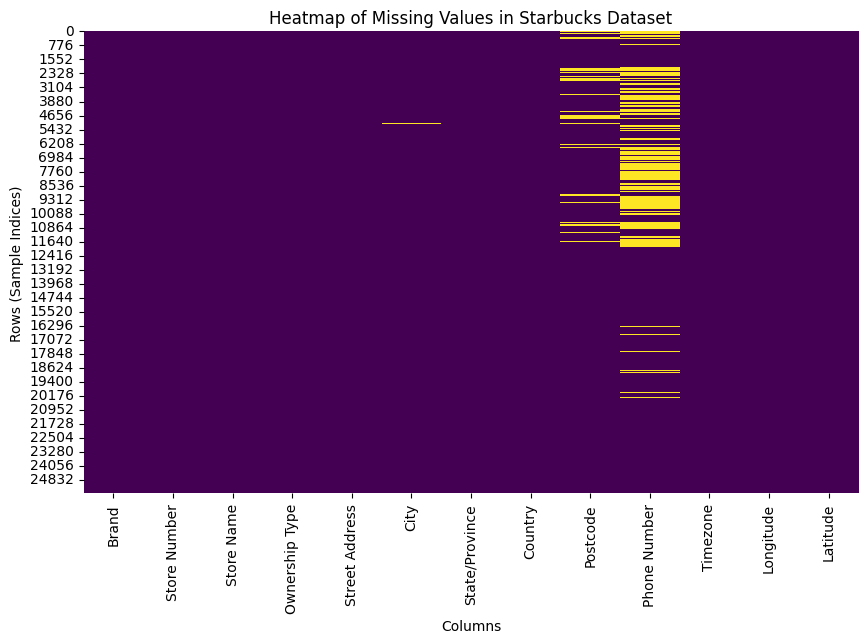

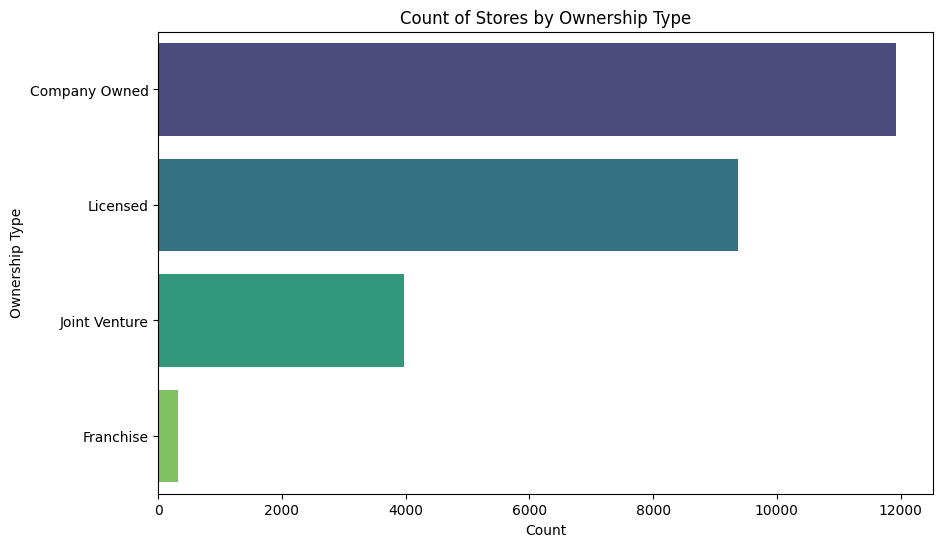

Geographic heat map saved to Starbucks_Global_Heatmap.html. Open this file in a web browser to view it.
Top 10 countries by Starbucks store count:
Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: count, dtype: int64
Ownership type distribution by country:
Ownership Type  Company Owned  Franchise  Joint Venture  Licensed
Country                                                          
AD                          0          0              0         1
AE                          0          0              0       144
AR                          0          0              1       107
AT                         17          0              0         1
AU                          0          0              0        22


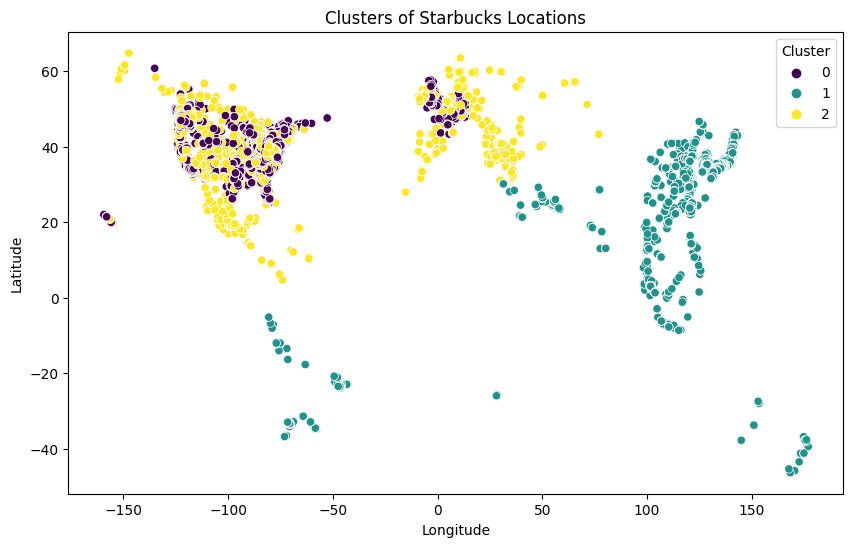

Random Forest Classifier Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3568
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00      1222
           3       1.00      1.00      1.00      2796

    accuracy                           1.00      7680
   macro avg       1.00      1.00      1.00      7680
weighted avg       1.00      1.00      1.00      7680



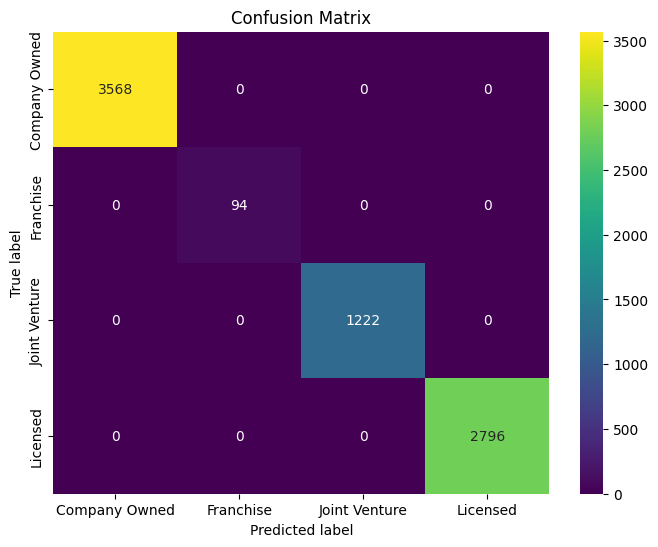

In [10]:
# Starbucks Store Analysis using Machine Learning
# This project utilized machine learning algorithms, including K-Means Clustering and Random Forest Classification, 
# to analyze Starbucks' store data and ownership types. 
# Code and guidance were supported by AI assistance (ChatGPT, OpenAI, 2024).
#This notebook uses the "Starbucks World Locations" dataset, publicly available on Kaggle:
"""https://www.kaggle.com/starbucks-worldwide-locations."""


"""
References:
OpenAI. (2024). ChatGPT (Version 4.0) [AI language model]. https://openai.com
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = '/kaggle/input/starbucks-worldwide-locations/directory.csv'
data = pd.read_csv(file_path)

#Step 1: Visualizing Missing Values (Heatmap) 
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values in Starbucks Dataset")
plt.xlabel("Columns")
plt.ylabel("Rows (Sample Indices)")
plt.show()

#Step 2: Bar Chart of Ownership Type
plt.figure(figsize=(10, 6))
ownership_counts = data['Ownership Type'].value_counts()
sns.barplot(x=ownership_counts.values, y=ownership_counts.index, palette='viridis')
plt.title("Count of Stores by Ownership Type")
plt.xlabel("Count")
plt.ylabel("Ownership Type")
plt.show()

# Step 3: Geographic Heat Map
geo_data = data.dropna(subset=['Latitude', 'Longitude'])
starbucks_map = folium.Map(location=[20, 0], zoom_start=2)
heat_data = list(zip(geo_data['Latitude'], geo_data['Longitude']))
HeatMap(heat_data).add_to(starbucks_map)
map_file_path = "Starbucks_Global_Heatmap.html"
starbucks_map.save(map_file_path)
print(f"Geographic heat map saved to {map_file_path}. Open this file in a web browser to view it.")

#Step 4: Data Analysis
country_counts = data['Country'].value_counts().head(10)
print("Top 10 countries by Starbucks store count:")
print(country_counts)

ownership_by_country = data.groupby(['Country', 'Ownership Type']).size().unstack(fill_value=0)
print("Ownership type distribution by country:")
print(ownership_by_country.head())

#Step 5: Data Preprocessing
# Fill missing values
data['Postcode'] = data['Postcode'].fillna('Unknown').astype(str)
data['Phone Number'] = data['Phone Number'].fillna('Unknown').astype(str)

# Encode Ownership Type
label_encoder = LabelEncoder()
data['Ownership Type Encoded'] = label_encoder.fit_transform(data['Ownership Type'])

#Step 6: K-Means Clustering
# Select features for clustering
clustering_features = data[['Latitude', 'Longitude', 'Ownership Type Encoded']].dropna()

# Standardize the data for clustering
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Add cluster labels back to the dataset
data['Cluster'] = kmeans.predict(scaler.transform(data[['Latitude', 'Longitude', 'Ownership Type Encoded']].fillna(0)))

# Visualize the cluster distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_features['Longitude'], 
    y=clustering_features['Latitude'], 
    hue=clustering_features['Cluster'], 
    palette='viridis'
)
plt.title("Clusters of Starbucks Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

# Step 7: Random Forest Classifier 
# Prepare the data for classification
classification_features = data[['Latitude', 'Longitude', 'Ownership Type Encoded']].dropna()
classification_labels = data.loc[classification_features.index, 'Ownership Type Encoded']

X = classification_features
y = classification_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=True, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()






















